# Treinando Modelos

Nesta aula iremos treinar nossos primeiros modelos baseados em função! E mais, serão modelos **lineares**! (mas isso não vem ao caso... ainda)

Vamos começar atacando um problema de regressão:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

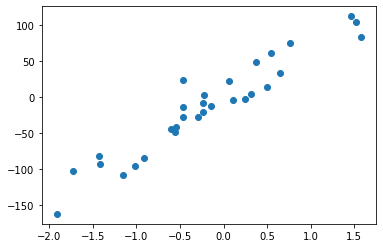

In [ ]:
points, values = make_regression(n_samples=30,n_features=1, noise=20, random_state=42)
plt.scatter(points, values);

Quando treinamos modelos, a ideia é encontrar um elemento matemático que represente o conhecimento aprendido. No exemplo acima, temos um dado que se comporta similar a uma *reta*.

Como que podemos representar uma reta? Uma das maneiras mais simples é escrevendo uma função!

$$ f(x) = ax + b $$

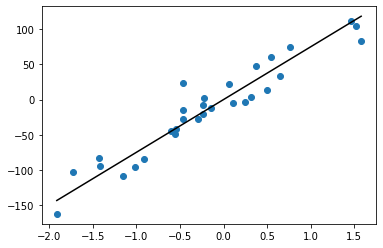

In [ ]:
def f(x):
  a = 75
  b = 0
  return a*x + b

x = np.linspace(points.min(), points.max(), 100)
plt.scatter(points, values)
y = f(x)
plt.plot(x, y, 'k');

Esse foi um palpite interessante, certo? A reta está passando bem pelos dados. Mas, mesmo assim, existem pontos que não estão na retas, ou seja, existe um **erro** entre o que foi *aprendido* e o *real*.

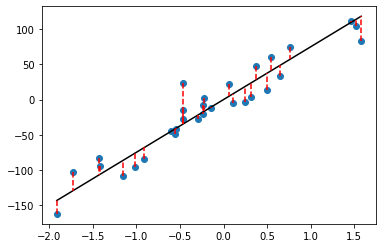

In [ ]:
x = np.linspace(points.min(), points.max(), 100)
y = f(x)
plt.scatter(points, values)
plt.plot(x, y, 'k')
for x,y,y_pred in zip(points, values, f(points)):
  plt.plot([x[0],x[0]], [y,y_pred[0]], 'r--')

Uma forma de *medir* esse erro é utilizando métricas. Mais na frente veremos métricas para avaliar seus modelos, mas, por hora, vamos conhecer o **erro quadrado médio** (*mean squared error*):

$$ MSE = \frac{\sum_i (y_i - f(x_i))^2}{N} $$

Como o próprio nome sugere, esse erro representa a média do quadrado das diferenças entre o que foi predito e o esperado.

Não deve ser nenhuma novidade para você, mas sim, o sklearn já traz essa métrica (e muitas outras) implementadas!

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(values, f(points)) # np.mean(np.sum(np.square(values - f(points))))

402.9802498651847

Acima, temos o valor da métrica para o modelo que construímos. Será que dá pra melhorar? Experimente mexer em $f(x)$ para verificar se o erro melhora!

#### **Para refletir**
Que outras métricas nós podemos extrair a partir do MSE? Será que conseguimos encontrar alguma fórmula que expresse melhor esses erros?

## Regressão Linear

Hora de afiar seus conhecimentos de álgebra linear, pois daqui pra frente é só pra $[0,-1]$ .

Podemos escrever o nosso modelo da forma $ y' = \theta \cdot x $, onde $\theta$ é um vetor com os coeficientes da função.

**Note:** na formulação anterior tínhamos $f(x) = ax + b$, onde $b$ é um **termo independente**. Para manter esse valor na representação anterior, podemos adicionar uma nova coluna em $x$, de valor 1, que será igual para todas as entradas.

A partir dessa formulação, podemos escrever, de forma mais genérica, a seguinte fórmula:

$$ \textbf{Y} = \theta \cdot \textbf{X} $$

Onde $\textbf{X}$ e $\textbf{Y}$ são, respectivamente, a matriz com todas as entradas e o vetor com todas as saídas.

Utilizando alguns *abra-cadabras matemágicos*, podemos encontrar uma solução **fechada** para o nosso modelo, permitindo que $\theta$ seja encontrada pela fórmula abaixo:

$$ \theta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T  \textbf{Y}$$

Essa fórmula também é conhecida como ***Ordinal Least Squares*** (OLS).

In [ ]:
def ols(x,Y):
    X = np.c_[np.ones((len(x),1)), x]
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

def predict(x,theta):
    X = np.c_[np.ones((len(x),1)), x]
    return X.dot(theta)

Coeficientes: [-0.25805881 70.42368833]
MSE: 386.21837671481694


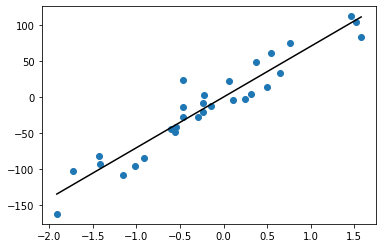

In [ ]:
plt.scatter(points, values)

theta = ols(points, values)
x = np.linspace(points.min(), points.max(), 100)
y = predict(x, theta)
plt.plot(x, y, 'k')
print(f"Coeficientes: {theta}")
print(f"MSE: {mean_squared_error(values, predict(points, theta))}")

No sklearn, esse modelo está implementado em *sklearn.linear_models.LinearRegression*

Coeficientes [70.42368833], -0.2580588116571292
MSE: 386.21837671481694


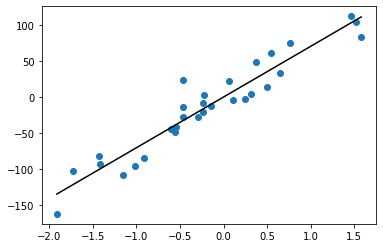

In [ ]:
from sklearn.linear_model import LinearRegression
plt.scatter(points, values)

model = LinearRegression()
model.fit(points, values)
x = np.linspace(points.min(), points.max(), 100)
y = model.predict(x.reshape(-1,1))
plt.plot(x, y, 'k')
print(f"Coeficientes {model.coef_}, {model.intercept_}")
print(f"MSE: {mean_squared_error(values, predict(points, theta))}")

#### **Será se...**

podemos sempre utilizar essa solução? Ela é infalível?

### Utilizando gradientes

E se, ao invés de tentar encontrar a melhor solução logo de uma vez, fossemos explorando valores para $\theta$, com o objetivo de encontrar o menor erro possível?

Vamos dar uma olhada no comportamento da função de erro, bem como onde encontra-se o valor predito para $\theta$.

**Note:** estamos visualizando apenas o valor de $\theta$ que multiplica os dados originais, ou seja, o valor que **não** é o termo independente. Fazemos isso para simplificar a visualização

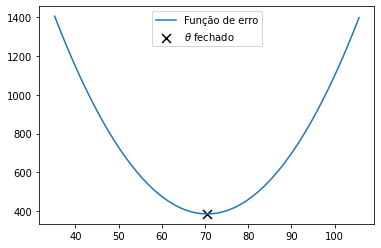

In [ ]:
thetas = np.linspace(0.5*theta[1], 1.5*theta[1], 100)
errors = np.square((points * thetas).T - values).mean(axis=1)
plt.plot(thetas, errors, label="Função de erro")
plt.scatter([theta[1]], [mean_squared_error(values, (points*theta[1]))], 
            c='k', marker="x", s=80, label="$\\theta$ fechado")
_ = plt.legend()

Vendo o gráfico acima, é fácil identificar o melhor valor para $\theta$. Mas e se não conseguíssemos visualizar? Como que poderíamos encontrar?

Vamos imaginar um valor aleatório para $\theta$:

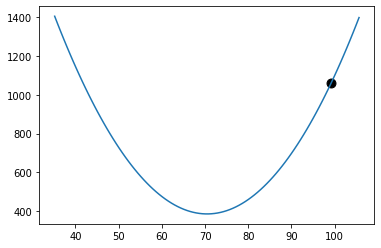

In [ ]:
plt.plot(thetas, errors, label="Função de erro")
idx = 90
plt.scatter([thetas[idx]], [errors[idx]], c='k', s=80);

Se analisarmos o gráfico acima, podemos ver que o valor escolhido de $\theta$ ainda não é o melhor possível. Visualmente, podemos ver que a função está diminuindo, ou seja, se aumentarmos um pouco o valor de $\theta$, o novo erro será ainda menor! Mas como que podemos *identificar* que a função está *diminuindo*?

É aí que entra o *gradiente* da função (que é um nome chique para *derivada*). Podemos  analisar o gradiente em um ponto $\theta_i$ e, a partir dele, escolher um novo ponto $\theta_{i+1}$ para calcular o erro. Após algumas iterações, encontraremos um valor de $\theta$ que possui um erro pequeno! (ou, ao menos, pequeno em relação ao todo)

A álgebra para deduzir a fórmula não é complexa, mas foge ao escopo desta aula. Portanto, vamos apenas analisar a fórmula para encontrar atualizar os valores de $\theta$:

$$ \theta_{k+1} = \theta_k - \frac{2\alpha}{N} \sum_i x_i (y_i' - y_i)$$

onde:

- $\alpha$ é a *taxa de aprendizagem*, um hiperparâmetro para controlar o tamanho do "passo" para a atualização de $\theta$ ;
- $N$ é o total de entradas.

Esse método é chamado de *Gradiente Descendente* e sua implementação encontra-se abaixo:

In [ ]:
def gd(x, Y, learning_rate, theta0, itter=10, return_history=False):
    X = np.c_[np.ones((len(x),1)), x]
    history = [theta0] if return_history else None
    theta = theta0
    for _ in range(itter):
        theta = theta - learning_rate * 2/X.shape[0] * X.T.dot(X.dot(theta) - Y)
        history.append(theta)
        
    if return_history:
        return theta, np.array(history).reshape(len(history), X.shape[1])
    
    return theta

Abaixo, vamos realizar o treinamento utilizando esta nova técnica! Além disso, vamos também visualizar os modelos encontrados durante o treinamento:

theta encontrado: [-0.50956397 68.80540696]
erro: 388.27175923978564


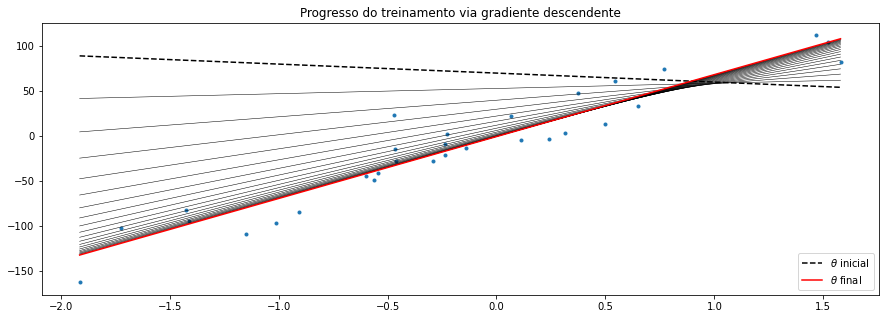

In [ ]:
theta, history = gd(points,values,0.1,np.array([70,-10]), itter=20, return_history=True)
y_pred = predict(points,theta)
print(f"theta encontrado: {theta.ravel()}\nerro: {mean_squared_error(values,y_pred)}")

plt.figure(figsize=(15,5))
plt.plot(points,values, '.')

plt.plot(x, predict(x,history[0]), 'k--', label="$\\theta$ inicial")
for theta in history[1:-1]:
    plt.plot(x, predict(x,theta), 'k', linewidth=.5)
    
plt.plot(x, predict(x,history[-1]), 'r', label="$\\theta$ final")

plt.legend()
_ = plt.title("Progresso do treinamento via gradiente descendente")

Olha que interessante: o modelo começou com uma linha horizontal (pois inicializamos $\theta$ como 0) e, conforme os passos foram sendo executados, a reta foi ficando cada vez melhor!

Vamos agora visualizar os erros dos modelos durante o treinamento. Mais uma vez, iremos visualizar apenas a componente de $\theta$ que não é referente ao termo independente.

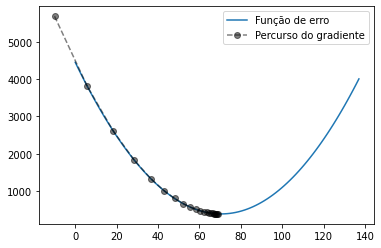

In [ ]:
thetas = np.linspace(0, 2*theta[1], 100)
errors = np.square((points * thetas).T - values).mean(axis=1)
plt.plot(thetas, errors, label="Função de erro")
# plt.scatter(history[:,1], [mean_squared_error(values, (points*t)) for t in history[:,1]], 
#             c='k', marker="x", s=80, label="$\\theta$ fechado")
plt.plot(history[:,1], [mean_squared_error(values, (points*t)) for t in history[:,1]], 
            'ko--', label="Percurso do gradiente", alpha=0.5)
_ = plt.legend()

Agora, vamos visualizar o percurso do gradiente analisando todo o $\theta$! Na imagem abaixo, os eixos são as componentes de $\theta$ e a intensidade da cor representa o erro para aquele valor de $\theta$. Quanto mais escuro, maior o erro.

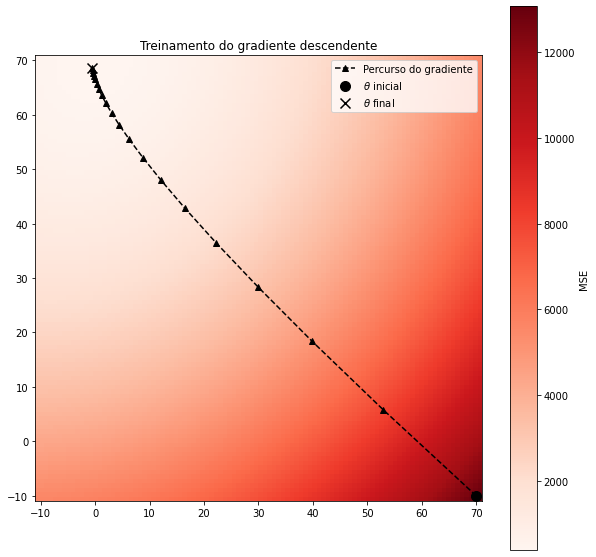

In [ ]:
xx = yy = np.linspace(history.min()-1, history.max()+1, 100)
grid = np.dstack(np.meshgrid(xx,yy)).reshape(-1,2)

errors = np.array([mean_squared_error(values, predict(points, theta)) for theta in grid])

plt.figure(figsize=(10,10))
img = plt.imshow(errors.reshape(100,100), origin='lower', extent=(xx[0],xx[-1],yy[0],yy[-1]), cmap="Reds")
plt.colorbar(img, label="MSE")

plt.scatter(history[0, 0], history[0, 1], marker='o', c='k', s=100, label="$\\theta$ inicial")
plt.scatter(theta[0], theta[1], marker='x', c='k', s=100, label="$\\theta$ final")

plt.plot(history[:-1, 0], history[:-1, 1], 'k^--', label="Percurso do gradiente")

plt.legend()
_ = plt.title("Treinamento do gradiente descendente")

O método do gradiente descendente já encontra-se implementado em *sklearn.linear_models.SGDRegressor*.

MSE: 389.13886531393626


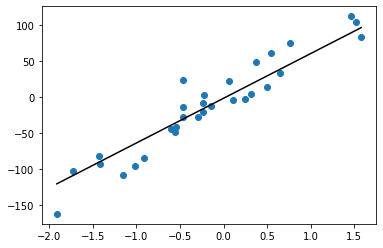

In [ ]:
from sklearn.linear_model import SGDRegressor
plt.scatter(points, values)

model = SGDRegressor(alpha=0.1)
model.fit(points, values)
x = np.linspace(points.min(), points.max(), 100)
y = model.predict(x.reshape(-1,1))
plt.plot(x, y, 'k')

print(f"MSE: {mean_squared_error(values, predict(points, theta))}")

### Prevendo curvas com retas

Confuso, né? Mas vai fazer sentido, prometo!

O que vimos até agora foram modelos *lineares*. Visualmente, temos como modelos lineares modelos que são construídos em forma de reta. E isso está certo!

Vamos para o seguinte exemplo: temos um conjunto de dados gerado por uma equação que **não é uma reta**:

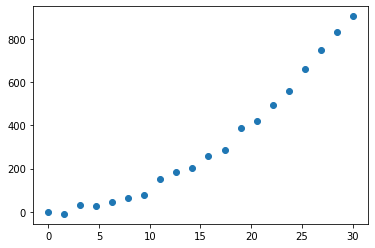

In [ ]:
X = np.linspace(0,30,20)
Y = X/2 + np.power(X,2) + np.random.randn(X.shape[0])*15
plt.scatter(X,Y);

É esperado que, se tentarmos treinar um dos modelos que vimos, não vai funcionar. Para os céticos de plantão, segue a prova:

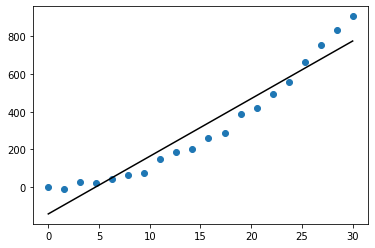

In [ ]:
plt.scatter(X, Y)

theta = ols(X, Y)
x = np.linspace(X.min(), X.max(), 100)
y = predict(x, theta)
plt.plot(x, y, 'k');

Um modelo linear representa uma *relação linear* entre valores. O que tentamos prever acima foi uma relação linear entre o valor de $x$ e $y$. Porém, como podemos ver no código, $y$ foi gerado combinando $x$, $x²$ e um termo independente aleatório.

E se... ao invés de tentarmos encontrar uma relação linear utilizando apenas $x$, nós treinassemos um modelo usando $x$ e $x^2$?

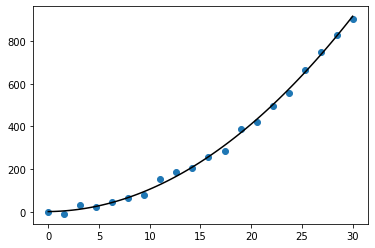

In [ ]:
plt.scatter(X, Y)

def transform(x):
  return np.c_[x, np.square(x)]

phi = transform(X)

theta = ols(phi, Y)
x = np.linspace(X.min(), X.max(), 100)
y = predict(transform(x), theta)
_ = plt.plot(x, y, 'k')

Pronto, temos uma curva! E sim, esse modelo continua sendo linear! Consegue ver o porquê?

Essa técnica é chamada de **Regressão Polinomial**. Ela consiste em utilizar os dados originais e combiná-los de maneira polinomial, gerando **novos atributos** provenientes das combinações!

## Regressão Logística

Agora que aprendemos a criar um **modelo** que representa uma **função linear**, para problemas de regressão, vamos criar um modelo que representa uma **função logística**, para problemas de classificação.

Vamos começar analisando o dataset abaixo:

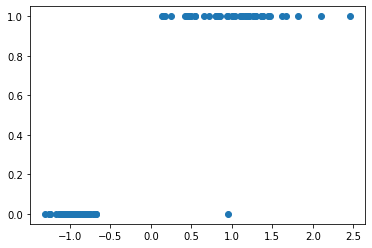

In [ ]:
from sklearn.datasets import make_classification

points, classes = make_classification(n_features=1, n_informative=1, 
                                      n_clusters_per_class=1, n_redundant=0,
                                      random_state=42)
plt.scatter(points, classes);

Veja como ele é diferente do anterior: enquanto os valores no eixo X variam, os do eixo Y são sempre 0 ou 1 (ou seja, a saída é *discreta*). Claramente, temos um problema de classificação.

Como você também pode ver, uma *reta* não conseguiria fazer essas predições. Por isso que, para esse problema, vamos explorar uma nova função: a *logística*.

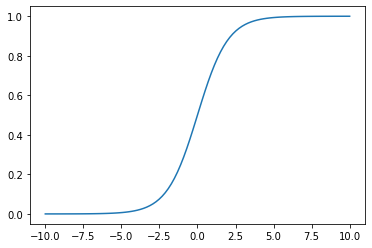

In [ ]:
def logistic_function(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-10,10,100)
y = logistic_function(x)
plt.plot(x,y);

Olha que interessante: ela vai de 0 à 1, assim como o nosso problema! Entretanto, ela prevê valores contínuos nesse intervalo... como que podemos, então, utilizar essa função?

E se... definisse-mos um threshold?

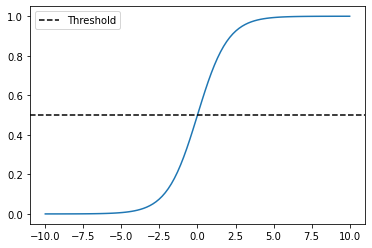

In [ ]:
plt.plot(x,y)

threshold = 0.5
plt.axhline(threshold, label="Threshold", color='k', linestyle='--')
plt.legend();

Então... com um certo threshold $\tau$, se o valor da função logística for menor que $\tau$, prevemos a classe como 0. Caso contrário, prevemos como 1!

Para deduzir a técnica da regressão logística, os passo a passo são semelhantes aos que fizemos com a linear. Portanto, como o aprofundamento matemático foge do nosso escopo, vamos às implementações do sklearn!

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model = LogisticRegression()
model.fit(points, classes)

LogisticRegression()

Agora que temos um modelo treinado, vamos tentar fazer uma visualização ingênua da função logística que ele aprendeu!

(-1.305955594295988, 2.4560134059681675)

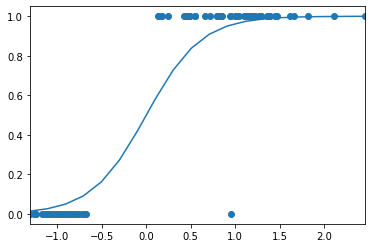

In [ ]:
def logistic_function(x, w):
  return 1/(1+np.exp(-x*w))

y = logistic_function(x, model.coef_[0])
plt.scatter(points, classes)
plt.plot(x,y)
plt.xlim(points.min(), points.max())

Provavelmente, nesse momento, você deve estar pensando:
> Ok, legal, funciona.... mas cadê a "linearidade" disso? Não foi dito no começo que veríamos modelos lineares? Esse povo pensa que somos bestas...

Então, se você não estava pensando nisso, você deve estar agora!

Vamos entender o porquê de esse modelo ser considerado *linear*. Comecemos com o dataset abaixo:

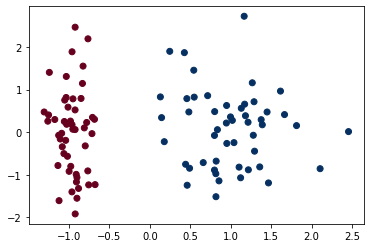

In [ ]:
from sklearn.datasets import make_classification

points, classes = make_classification(n_features=2, n_informative=1, 
                                      n_clusters_per_class=1, n_redundant=0,
                                      random_state=42)
plt.scatter(points[:,0], points[:,1], c=classes, cmap="RdBu")

Vamos treinar um modelo de regressão logística pra ele.

In [ ]:
model = LogisticRegression()
model.fit(points,classes)

LogisticRegression()

Não sei se vocês lembram, mas na aula de introdução a Matplotlib, falamos do método `predict_proba`, que retorna a probabilidade do elemento pertencer a cada classe.

**OBS:** a regressão logística é um modelo *probabilístico*. Portanto, ele e capaz de dizer não apenas as classes a que um dado pertence, mas também a probabilidade de ele estar certo.

In [ ]:
model.predict_proba(points)

array([[1.04435586e-01, 8.95564414e-01],
       [8.97446826e-01, 1.02553174e-01],
       [6.44425293e-03, 9.93555747e-01],
       [2.13697305e-02, 9.78630269e-01],
       [7.53712645e-03, 9.92462874e-01],
       [7.51485917e-03, 9.92485141e-01],
       [9.52949085e-01, 4.70509147e-02],
       [9.62284993e-01, 3.77150073e-02],
       [9.71141454e-01, 2.88585462e-02],
       [4.05362729e-02, 9.59463727e-01],
       [3.44255326e-02, 9.65574467e-01],
       [2.29828849e-02, 9.77017115e-01],
       [9.01837126e-01, 9.81628739e-02],
       [9.47451434e-01, 5.25485660e-02],
       [9.13757608e-01, 8.62423915e-02],
       [9.84959041e-01, 1.50409586e-02],
       [9.72778437e-01, 2.72215626e-02],
       [5.04238638e-03, 9.94957614e-01],
       [1.88350828e-02, 9.81164917e-01],
       [4.48845389e-02, 9.55115461e-01],
       [4.59611103e-04, 9.99540389e-01],
       [1.40864547e-01, 8.59135453e-01],
       [8.89696490e-01, 1.10303510e-01],
       [9.62452364e-01, 3.75476361e-02],
       [1.147364

Vamos refazer aquele exercício do Matplotlib: visualizar a superfície de decisão gerada pelo modelo, a fim de entender a região representada por cada classe:

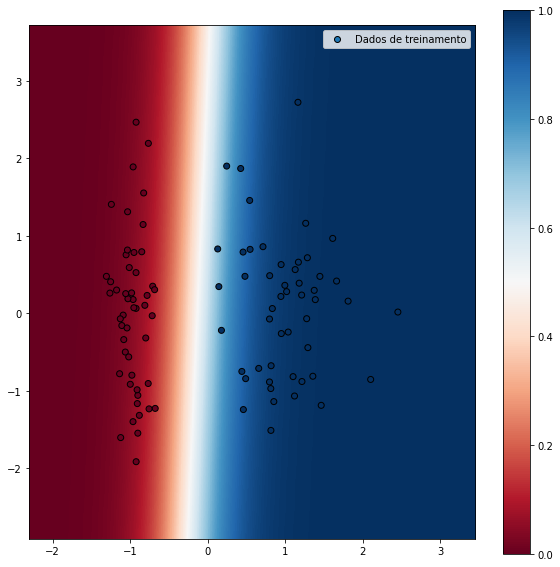

In [ ]:
# vamos definir o espaço a ser renderizado na imagem

margin = 1 # uma margem para que todos os pontos possam aparecer
resolution = 200 # a qualidade da imagem que geraremos
xx = np.linspace(points[:,0].min()-margin, points[:,0].max()+margin, resolution)
yy = np.linspace(points[:,1].min()-margin, points[:,1].max()+margin, resolution)

# fazemos todas as combinações possíveis para os eixos
grid = np.dstack(np.meshgrid(xx,yy)).reshape(-1,2)

# calculamos a probabilidade de os elementos pertencerem a classe na posição 1
# consequentemente, valores baixos representam que o elemento pertence a outra classe
probs = model.predict_proba(grid)[:,1].reshape(resolution, resolution)

plt.figure(figsize=(10,10))
plt.imshow(probs, extent=(xx[0], xx[-1], yy[0], yy[-1]), cmap="RdBu")
s = plt.scatter(points[:,0], points[:,1], c=classes, cmap="RdBu", label="Dados de treinamento", edgecolors="k")
plt.colorbar(s)
_ = plt.legend()

O que temos no gráfico acima é o seguinte: a intensidade das cores representa o quão "certo" o modelo está de o elemento naquela posição pertencer a classe a uma classe. No caso, a área branca, é a área de *incerteza*, onde as probabilidades são próximas ou iguais. Essa região é quem **separa** as classes.

Consegue entender por que esse modelo é linear? Aproveitando, consegue também entender o que seria um dado *linearmente separável*?